# Chapter 6 - Exercises

## 1.

In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

df = pd.read_csv('chapter_06.csv')
print(df)

      RED  GREEN  BLUE  LIGHT_OR_DARK_FONT_IND
0       0      0     0                       0
1       0      0   128                       0
2       0      0   139                       0
3       0      0   205                       0
4       0      0   238                       0
...   ...    ...   ...                     ...
1340   95    158   160                       1
1341   96    123   139                       0
1342   97     97    97                       0
1343   99    184   255                       1
1344   99     99    99                       0

[1345 rows x 4 columns]


In [2]:
print(df.to_numpy())

[[  0   0   0   0]
 [  0   0 128   0]
 [  0   0 139   0]
 ...
 [ 97  97  97   0]
 [ 99 184 255   1]
 [ 99  99  99   0]]


In [3]:
input = df.to_numpy()[:, :-1]
print(input)

output = df.to_numpy()[:, -1]
print(output)

[[  0   0   0]
 [  0   0 128]
 [  0   0 139]
 ...
 [ 97  97  97]
 [ 99 184 255]
 [ 99  99  99]]
[0 0 0 ... 0 1 0]


Beta 0 (intercept): [-5009.26686729]
Beta n (coefficients): [11.74211036 23.11062772  4.42097667]
Accuracy mean: 0.9985152190051968
Standard deviation: 0.00209979742000461


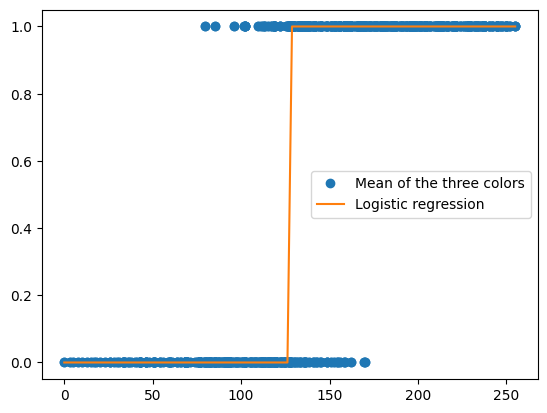

In [21]:
kfold = KFold(n_splits=3, shuffle=True)
model = LogisticRegression(penalty=None)
model.fit(input, output)
results = cross_val_score(model, input, output, cv=kfold)

b0 = model.intercept_.flatten()
bn = model.coef_.flatten()

print(f"Beta 0 (intercept): {b0}")
print(f"Beta n (coefficients): {bn}")
print(f"Accuracy mean: {results.mean()}")
print(f"Standard deviation: {results.std()}")

plt.subplot()
plt.plot(np.mean(input, axis=1), output, 'o', label="Mean of the three colors")

x = np.linspace(0, 255, 100)
y = expit(b0+sum(i*x for i in bn))
plt.plot(x, y, label="Logistic regression")

plt.legend()
plt.show()



## 2.

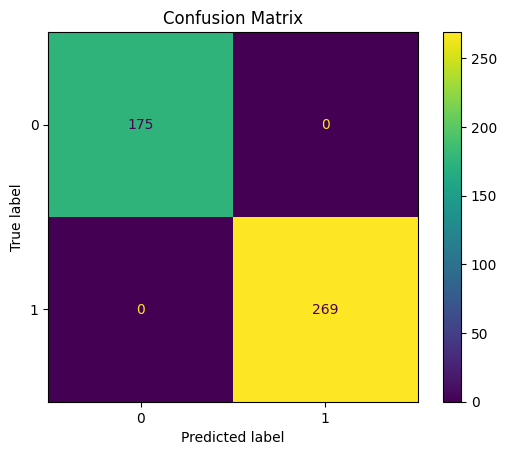

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(input, output, test_size=.33)

model.fit(X_train, Y_train)
prediction = model.predict(X_test)
matrix = confusion_matrix(y_true=Y_test, y_pred=prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
disp.ax_.set_title("Confusion Matrix")
plt.show()

## 3.

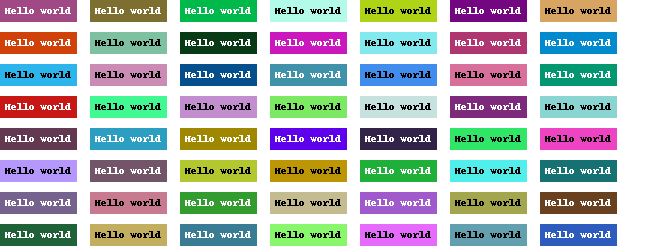

In [23]:
from PIL import Image, ImageDraw, ImageFont
import random

margin = 5
image = Image.new("RGB", (650, 250), "white")
font = ImageFont.load_default()

for pos_x in range(7):
    for pos_y in range(8):
        color = tuple([random.randint(0, 255) for _ in range(3)])
        draw = ImageDraw.Draw(image)
        position = (margin+90*pos_x, margin+32*pos_y)
        text = "Hello world"
        left, top, right, bottom = draw.textbbox(position, text, font=font)
        draw.rectangle((left-margin, top-margin, right+margin, bottom+margin), fill=color)
        draw.text(position, text, font=font, fill="black" if model.predict(np.array([color]))[0] == 1 else "white")

display(image)


## 4.

Logistic regression is very effective for this task.